In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from config.path import PATH # config/path.py to manage your dataset paths
coco_path = PATH["COCO"]

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

2022-07-16 14:56:49.579127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 14:56:49.587655: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 14:56:49.588456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


### Retina COCO dataset 불러오기

In [7]:
from data.retina import RetinaDataset

image_path = "/home/files/datasets/COCO/images/val2017"
annotation_path = "/home/files/datasets/COCO/annotations/instances_val2017.json"

#Retina COCO dataset 불러오기
dataset = RetinaDataset(image_path, annotation_path, num_examples=1, shuffle=False)
#데이터 item 한 개 샘플링
print("image id to be brought: ", dataset.image_ids[0])
items = dataset.get_item(dataset.image_ids[0])
image, boxes, labels = items
print(image.shape)
print(bbox)
print(class_id)

loading annotations into memory...
Done (t=0.82s)
creating index...
index created!
image id to be brought:  397133
(768, 1152, 3)
tf.Tensor(
[[ 641.0074    402.1699    706.19653   498.7248  ]
 [ 488.82684   401.66833  1068.3735    713.92096 ]
 [ 237.2993    116.902466  420.22687   581.0681  ]
 [ 806.0618    417.0335    843.3797    465.16882 ]
 [ 903.854     575.1494   1017.74695   643.41504 ]
 [ 843.16235   480.4504    970.3472    549.50183 ]
 [ 745.82166   274.75092  1067.7715    439.2202  ]
 [ 966.11725   439.4041   1070.0454    500.8816  ]
 [ 828.91736   455.622     870.4151    512.88617 ]
 [ 779.6953    447.93106   833.5152    507.88705 ]
 [ 765.7512    282.47528   809.272     311.11572 ]
 [ 777.35455   190.85263   807.2155    217.30284 ]
 [ 886.9172    509.5757    904.94073   518.8884  ]
 [ 777.7056    428.6201    792.4522    459.68484 ]
 [ 885.51276   491.50198   925.5726    510.1943  ]
 [ 937.25946   495.16354   952.77515   502.82104 ]
 [ 750.1018    352.6134   1070.0454    518.

### 시각화 함수

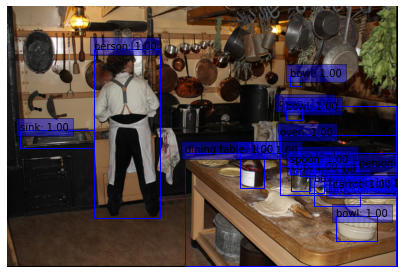

<AxesSubplot:>

In [10]:
from utils.visualize import visualize_detections

classes = [dataset.labels[label] for label in labels]
visualize_detections(image, boxes, classes, tf.ones_like(labels))